# Podstawy Reprezentacji i Analizy Danych: PROJEKT
## Monika Osiak, Marharyta Kruk

### Wstęp

Problemy z kręgosłupem mogą być wywołane przez wiele czynników - jakiekolwiek podrażnienie jednego z nerwów, które składają się na rozbudowany system nerwowy powiązany z kręgosłupem, może skutkować bólem promieniującym na inne części ciała.

Zestaw rozpatrywanych przez nas danych składa się z 310 obserwacji, opisywanych przez dwanaście atrybutów opisujących (dotyczących budowy kręgosłupa) oraz atrybutu decyzyjnego określającego, czy obserwacja dotyczy osoby zdrowej (Normal) czy zmagającej się z bólem (Abnormal).

Naszym zadaniem jest określenie na podstawie danych o budowie kręgosłupa, czy osoba cierpi na bóle pleców czy nie.

### Przygotowanie danych

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

# ustawienie formatu wyświetlania liczb zmiennoprzecinkowych
pd.options.display.float_format = "{:.1f}".format 

# ignorowanie ostrzeżeń
import warnings
warnings.filterwarnings('ignore')

Wczytuję dane z pliku, dokonuję zamiany oznaczeń atrybutu decyzyjnego (Abnormal => 1, Normal => 0), po czym wyświetlam pięć pierwszych rekordów. Prowadzę zamianę atrybutu decyzyjnego do zastosowania regresji logistycznej w następnych krokach. 

In [60]:
data = pd.read_csv('dataset_spine.csv', usecols=range(13))

columns = ['pelvic_incidence',
           'pelvic tilt',
           'lumbar_lordosis_angle',
           'sacral_slope',
           'pelvic_radius', 
           'degree_spondylolisthesis',
           'pelvic_slope',
           'Direct_tilt',
           'thoracic_slope',
           'cervical_tilt',
           'sacrum_angle',
           'scoliosis_slope',
           'Class_att']
data.columns = columns
columns = columns[:-1] # przygotowanie listy zmiennych do dalszego użycia potem
data["Class_att"] = [1 if i=="Abnormal" else 0 for i in data.Class_att]
data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.0,22.6,39.6,40.5,98.7,-0.3,0.7,12.6,14.5,15.3,-28.7,43.5,1
1,39.1,10.1,25.0,29.0,114.4,4.6,0.4,12.9,17.5,16.8,-25.5,16.1,1
2,68.8,22.2,50.1,46.6,106.0,-3.5,0.5,26.8,17.5,16.7,-29.0,19.2,1
3,69.3,24.7,44.3,44.6,101.9,11.2,0.4,23.6,12.7,11.4,-30.5,18.8,1
4,49.7,9.7,28.3,40.1,108.2,7.9,0.5,35.5,16.0,8.9,-16.4,24.9,1


Sprawdzam, ile danych mam do dyspozycji.

In [61]:
data.shape
print('Liczba obserwacji: {},\nliczba atrybutów: {}'.format(data.shape[0], data.shape[1] - 1))

Liczba obserwacji: 310,
liczba atrybutów: 12


In [62]:
data.isna().sum()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Class_att                   0
dtype: int64

Dane są kompletne - brak NaN.

In [63]:
data.groupby('Class_att').count().pelvic_radius

Class_att
0    100
1    210
Name: pelvic_radius, dtype: int64

Wśród dostępnych obserwacji jest 100 obserwacji ludzi zdrowych i 210 obserwacji ludzi cierpiących na bóle kręgosłupa.

Nie jest to sytuacja idealna, ponieważ obserwacji nieprawidłowych jest ponad dwa razy więcej niż obserwacji prawidłowych, co będzie wpływać na jakość wytrenowania klasyfikatorów. Z drugiej strony taki rozkład ilości grup może oznaczać, że wśród pacjentów większość skarży się na bóle kręgosłupa.

## Analiza atrybutów

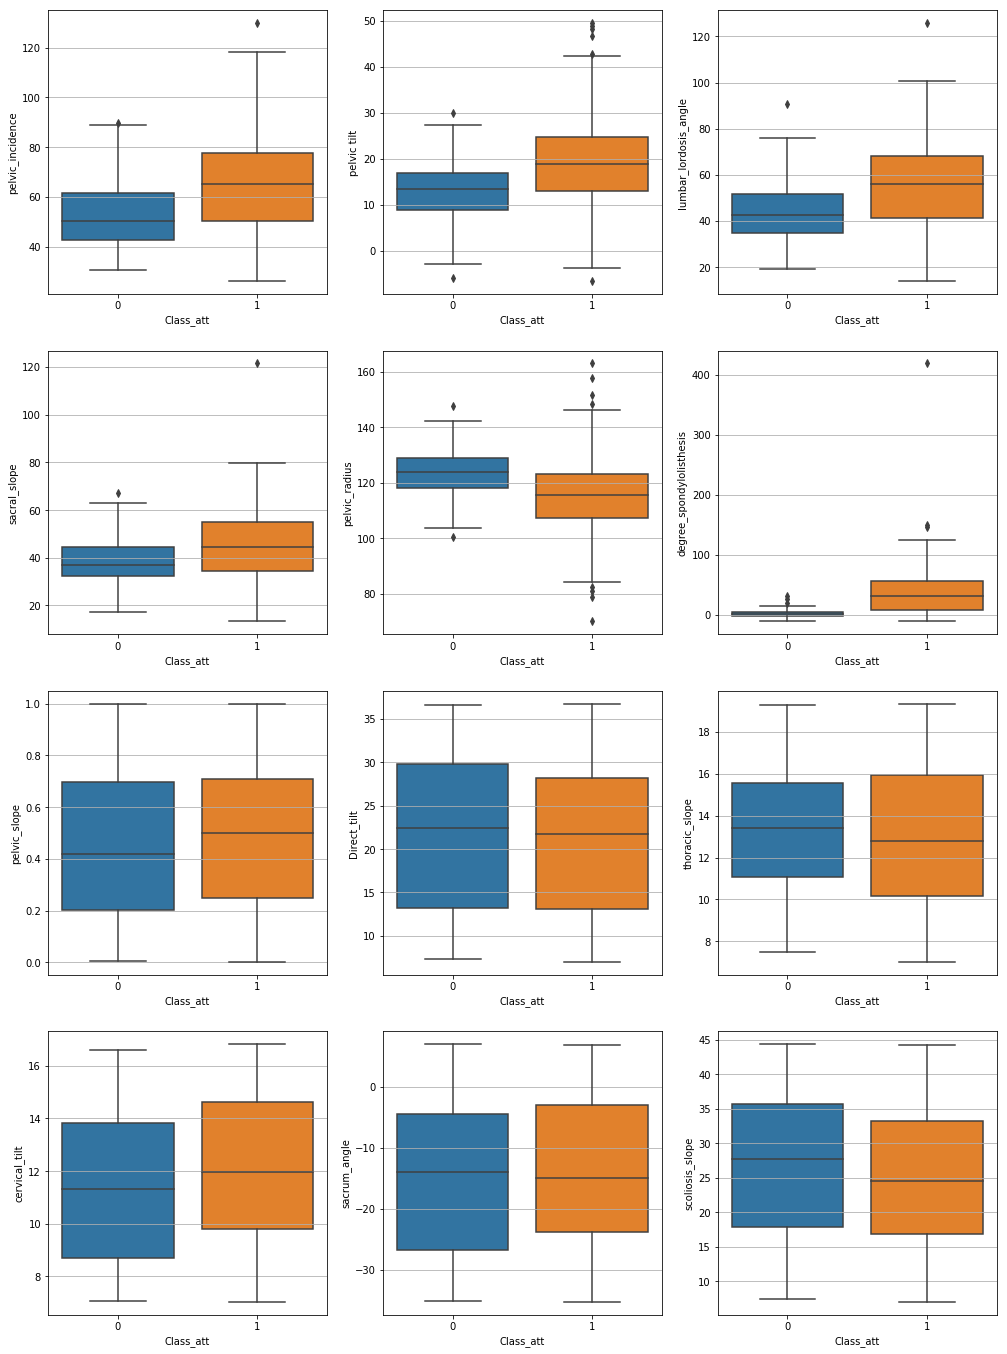

In [64]:
plt.figure(figsize=(17,24))
for i, c in enumerate(columns):
    plt.subplot(4, 3, i+1)
    plt.grid()
    sns.boxplot(x=data.Class_att, y=data[c])

## Histogramy cech

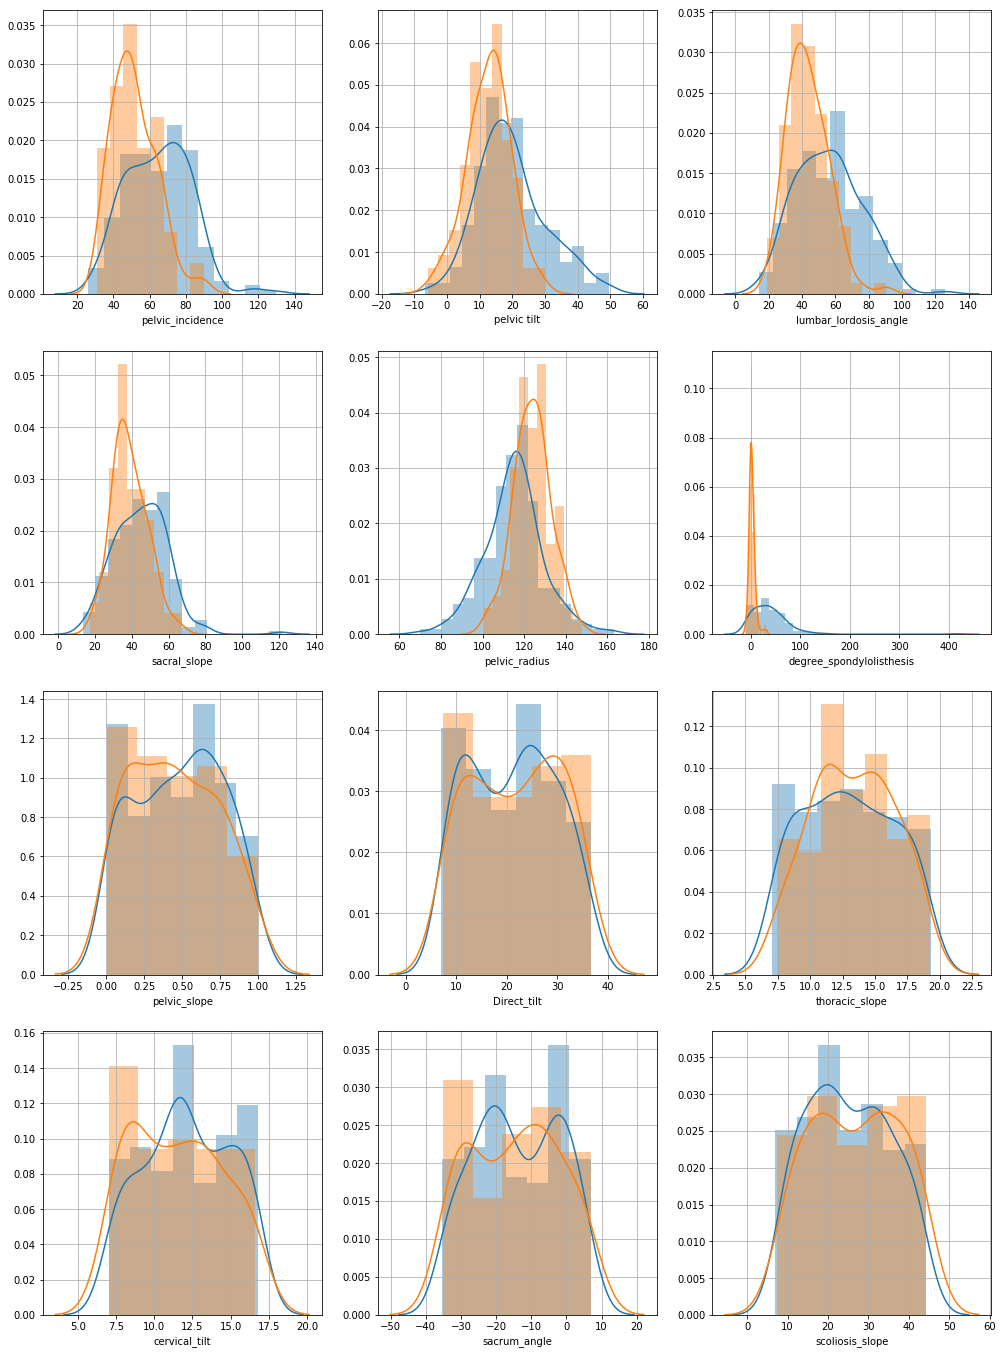

In [65]:
plt.figure(figsize=(17,24))
for i, c in enumerate(columns):
    plt.subplot(4, 3, i+1)
    plt.grid()
    sns.distplot(data.loc[data.Class_att == 1, c], label="Abnormal")
    sns.distplot(data.loc[data.Class_att == 0, c], label="Normal")

## Wykresy punktowe


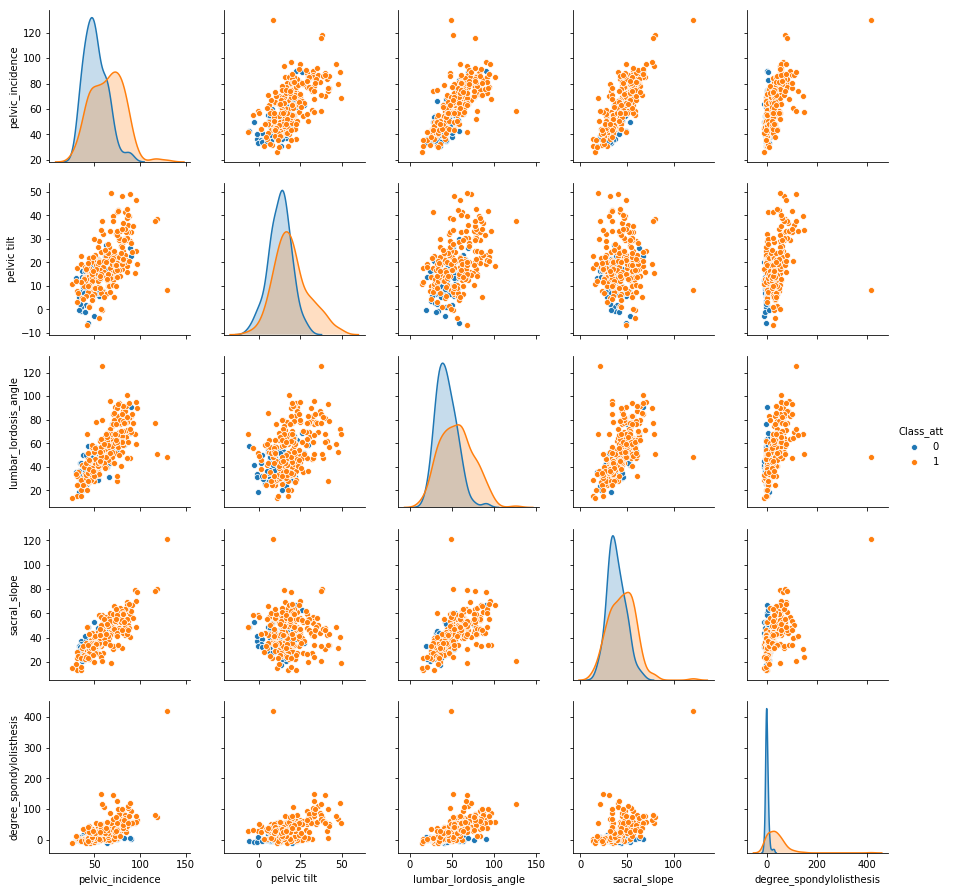

In [66]:
i = data
sns.pairplot(i, hue = 'Class_att', vars=['pelvic_incidence',
              'pelvic tilt',
              'lumbar_lordosis_angle',
              'sacral_slope',
              'degree_spondylolisthesis'])
plt.show()

## Standaryzacja danych

In [67]:
from sklearn import preprocessing

x = data.drop(["Class_att"],axis=1)
y = data.Class_att.values
names = x.columns

scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=names)
x.head()


,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,0.1,0.5,-0.7,-0.2,-1.4,-0.7,1.0,-1.0,0.4,1.2,-1.2,1.7
1,-1.2,-0.7,-1.5,-1.0,-0.3,-0.6,-0.2,-1.0,1.3,1.7,-0.9,-0.9
2,0.5,0.5,-0.1,0.3,-0.9,-0.8,0.0,0.6,1.3,1.6,-1.2,-0.6
3,0.5,0.7,-0.4,0.1,-1.2,-0.4,-0.4,0.3,-0.1,-0.2,-1.3,-0.7
4,-0.6,-0.8,-1.3,-0.2,-0.7,-0.5,0.2,1.6,0.9,-1.1,-0.2,-0.1


## Korelacja między atrybutami

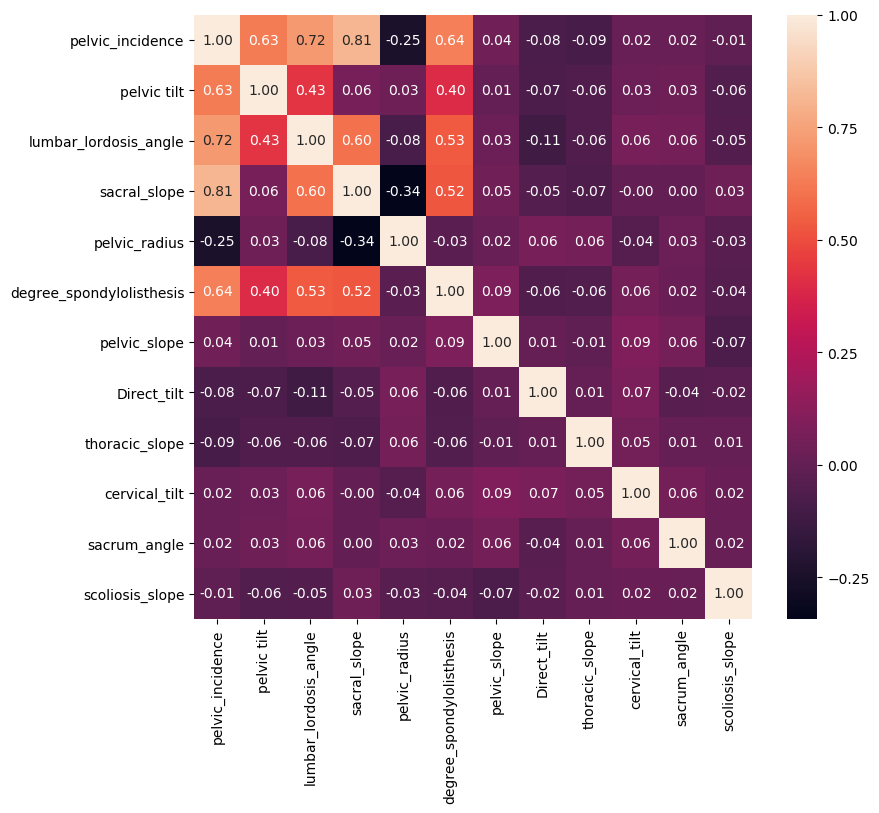

In [68]:
plt.figure(figsize=(9,8), dpi = 100)
sns.heatmap(x.corr(), annot=True, fmt='.2f')

Mapa ciepła pokazuje, że część atrybutów jest ze sobą bardzo skorelowana, podczas gdy inne nie mają żadnego wpływu. Ograniczyłyśmy nasze dane do atrybutów:
* pelvic incidence
* pelvic tilt
* lumbar lordosis angle
* sacral slope
* degree spondylolisthesis

które to atrybuty są najbardziej skorelowane ze sobą.

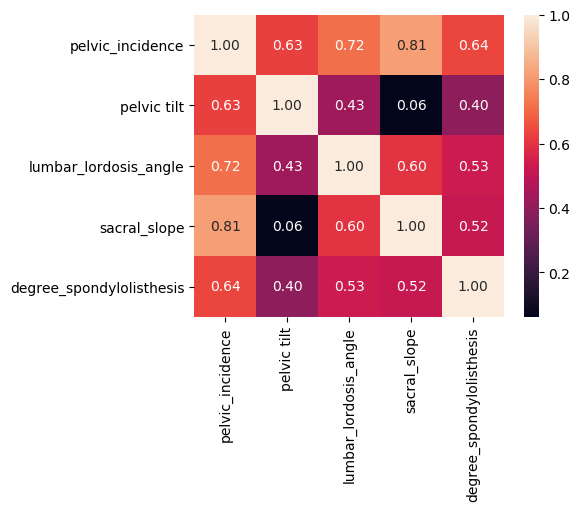

In [69]:
x = x.loc[:, ['pelvic_incidence',
              'pelvic tilt',
              'lumbar_lordosis_angle',
              'sacral_slope',
              'degree_spondylolisthesis'
              ]]
plt.figure(figsize=(5,4), dpi = 100)
sns.heatmap(x.corr(), annot=True, fmt='.2f')

## Podział zbioru danych na część treningową i testową

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Regresja logistyczna

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

print("Logistic regression test accuracy:", lr_model.score(x_test,y_test))
print()
print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test,y_pred),
             columns=['Predicted_Normal','Predicted_Abnormal'],
             index=['Actual_Normal','Actual_Abnormal'])

Logistic regression test accuracy: 0.9032258064516129

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        24
           1       0.94      0.93      0.93        69

   micro avg       0.90      0.90      0.90        93
   macro avg       0.87      0.88      0.88        93
weighted avg       0.90      0.90      0.90        93



,Predicted_Normal,Predicted_Abnormal
Actual_Normal,20,4
Actual_Abnormal,5,64


Poprawność przewidywania na poziomie 81,72% sprawia, że klasyfikacja z użyciem regresji logistycznej jest najodpowiedniejsza w tym zadaniu.

## Naiwny klasyfikator bayesowski

In [72]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
y_pred = gnb_model.predict(x_test)

print("Naive Bayes test accuracy:", gnb_model.score(x_test,y_test))
print()
print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test,y_pred),
             columns=['Predicted_Normal','Predicted_Abnormal'],
             index=['Actual_Normal','Actual_Abnormal'])

Naive Bayes test accuracy: 0.7741935483870968

              precision    recall  f1-score   support

           0       0.54      0.83      0.66        24
           1       0.93      0.75      0.83        69

   micro avg       0.77      0.77      0.77        93
   macro avg       0.73      0.79      0.74        93
weighted avg       0.83      0.77      0.79        93



,Predicted_Normal,Predicted_Abnormal
Actual_Normal,20,4
Actual_Abnormal,17,52


Naiwny klasyfikator Bayesa osiągnął bardzo dobrą precyzję przy przewidywaniu, które obserwacje są nieprawidłowe, ale przy obserwacjach w normie okazał się kiepski.

## Algorytm k najbliższych sąsiadów (KNN)

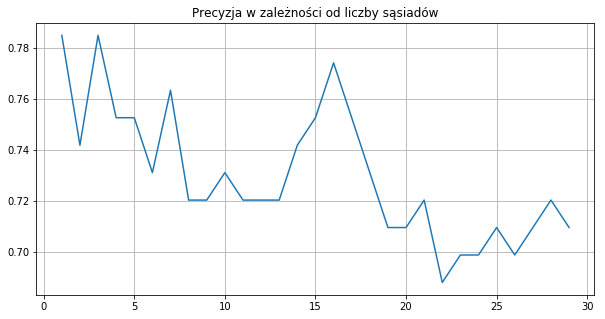

In [73]:
from sklearn.neighbors import KNeighborsClassifier

graph = []
for i in range(1, 30):
    knn_model = KNeighborsClassifier(i)
    knn_model.fit(x_train, y_train)
    graph.append(knn_model.score(x_test, y_test))

plt.figure(figsize=(10,5))    
sns.lineplot(x = range(1,30), y = graph)
plt.title('Precyzja w zależności od liczby sąsiadów')
plt.grid()
plt.show()

Największą precyzję otrzymujemy przy uwzględnieniu jednego lub trzech sąsiadów.

In [74]:
knn_model = KNeighborsClassifier(3)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

print("KNN test accuracy:", knn_model.score(x_test,y_test))
print()
print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test,y_pred),
             columns=['Predicted_Normal','Predicted_Abnormal'],
             index=['Actual_Normal','Actual_Abnormal'])

KNN test accuracy: 0.7849462365591398

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        24
           1       0.86      0.86      0.86        69

   micro avg       0.78      0.78      0.78        93
   macro avg       0.72      0.72      0.72        93
weighted avg       0.78      0.78      0.78        93



,Predicted_Normal,Predicted_Abnormal
Actual_Normal,14,10
Actual_Abnormal,10,59


Klasyfikator KNN jest nieco lepszy od klasyfikatora Bayesa, ale nieco gorszy od regresji logistycznej. Jest to też kolejny klasyfikator, który wykazuje się lepszą precyzją przy przewidywaniu obserwacji nieprawidłowych.

## Metoda wektorów nośnych (SVM)

In [128]:
from sklearn.svm import SVC 

svclassifier = SVC(kernel='poly', degree=4)  
svclassifier.fit(x_train, y_train)  
y_pred = svclassifier.predict(x_test)

print("SVM test accuracy:", knn_model.score(x_test,y_test))
print()
print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test,y_pred),
             columns=['Predicted_Normal','Predicted_Abnormal'],
             index=['Actual_Normal','Actual_Abnormal'])

SVM test accuracy: 0.7849462365591398

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.74      1.00      0.85        69

   micro avg       0.74      0.74      0.74        93
   macro avg       0.37      0.50      0.43        93
weighted avg       0.55      0.74      0.63        93



,Predicted_Normal,Predicted_Abnormal
Actual_Normal,0,24
Actual_Abnormal,0,69


Jak widać, metoda SVM ma wysoką skuteczność predykcji, ale rzeczywiście nie klasyfikuje dobrze zdrowych ludzi. To jest związane z 
niewłaściwym doborom parametrów tej metody. 

In [112]:
from mlxtend.plotting import plot_decision_regions
x_svm = x.loc[:, ['sacral_slope',
              'degree_spondylolisthesis'
              ]]
x_tr, x_te, y_tr, y_te = train_test_split(x_svm, y, test_size=0.3, random_state=42)

Na wynik metody SVM ma duży wpływ parametry kernel oraz degree dla kernel=poly. Zbadałam wpływ różnych parametrów na skuteczność tej metody. Badałam użycie tej metody na dwóch atrybutach, najbardziej skorelowanych z innymi.

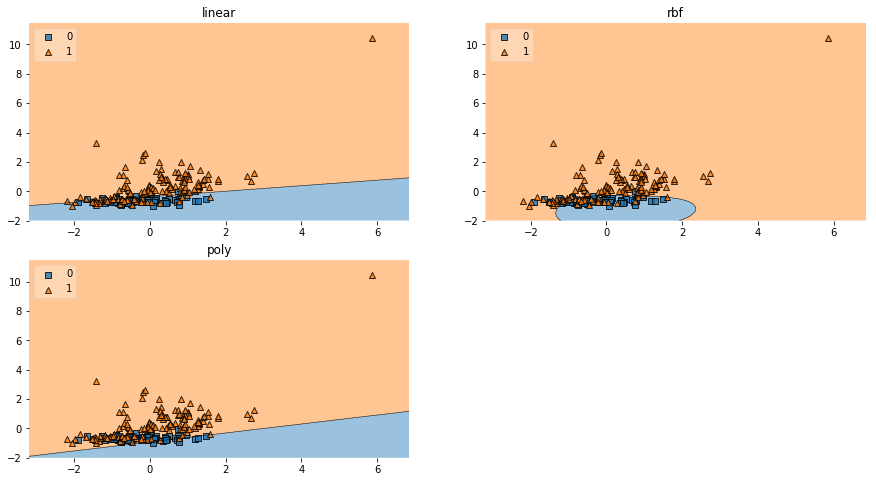

In [142]:
import matplotlib.gridspec as gridspec
import itertools

kernels = ['linear', 'rbf', 'poly']

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(15,8))

for kernel, grd in zip(kernels, itertools.product([0, 1], repeat=2)):
    svclassifier = SVC(kernel=kernel, degree=3)  
    svclassifier.fit(x_tr, y_tr) 
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x_tr.values, 
                      y=y_tr,
                      clf=svclassifier,
                      legend=2)
    plt.title(kernel)

plt.show()

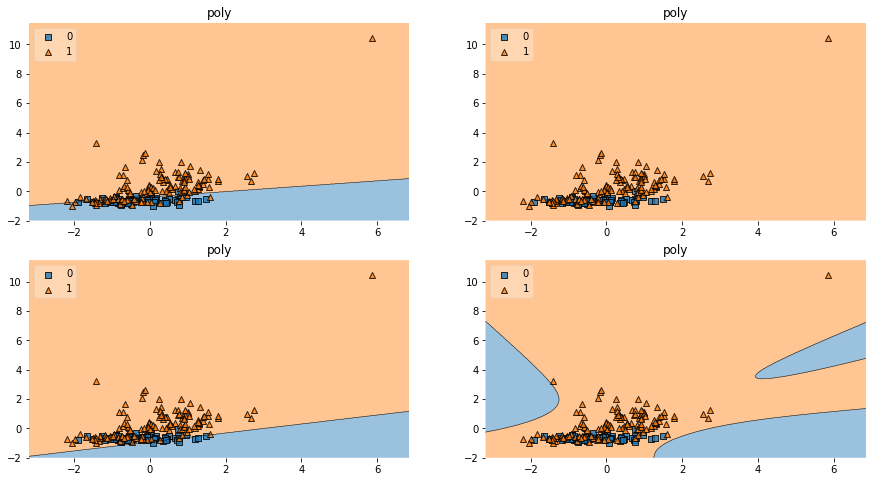

In [153]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(15,8))

for  dgr, grd in zip([1, 2, 3, 4], itertools.product([0, 1], repeat=2)):
    svclassifier = SVC(kernel='poly', degree=dgr)  
    svclassifier.fit(x_tr, y_tr) 
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x_tr.values, 
                      y=y_tr,
                      clf=svclassifier,
                      legend=2)
    plt.title(kernel)

plt.show()

Jak widać z otrzymanych wykresów, najgorsze wyniki są przy użyciu metody poly z wartością degree = 4: dlatego mieliśmy 0 dla zdrowych ludzi. Przy odpowiednim doborze parametrów tej metody można uzyskać dobre wyniki. 

## Drzewa decyzyjne

In [76]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(max_depth=2)
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)

print("Tree test accuracy:", tree_model.score(x_test,y_test))
print()
print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test,y_pred),
             columns=['Predicted_Normal','Predicted_Abnormal'],
             index=['Actual_Normal','Actual_Abnormal'])

Tree test accuracy: 0.8064516129032258

              precision    recall  f1-score   support

           0       0.59      0.79      0.68        24
           1       0.92      0.81      0.86        69

   micro avg       0.81      0.81      0.81        93
   macro avg       0.76      0.80      0.77        93
weighted avg       0.83      0.81      0.81        93



,Predicted_Normal,Predicted_Abnormal
Actual_Normal,19,5
Actual_Abnormal,13,56


In [5]:
# pobranie pakietu do narysowania drzewa
import sys
!conda install --yes --prefix {sys.prefix} pydotplus
!conda install --yes --prefix {sys.prefix} graphviz

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [19]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(tree_model, out_file='tree.dot',
                rounded = True, proportion = False, 
                precision = 2, filled = True, feature_names=columns, class_names=['Normal', 'Abnormal'])

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

'''dot_data = tree.export_graphviz(tree_model, out_file=None, feature_names=columns)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())'''

'dot_data = tree.export_graphviz(tree_model, out_file=None, feature_names=columns)\n\n# Draw graph\ngraph = pydotplus.graph_from_dot_data(dot_data)  \n\n# Show graph\nImage(graph.create_png())'

Klasyfikator z użyciem drzew decyzyjnych osiągnął drugą najlepszą skuteczność spośród przetestowanych przez nas klasyfikatorów - w porównaniu z regresją logistyczną ma lepszą precyzję w przewidywaniu obserwacji nieprawidłowych i gorszą w przypadku obserwacji prawidłowych.

## Losowy las decyzyjny

In [77]:
from sklearn.ensemble import RandomForestClassifier

n_trees = [10, 20, 50, 100, 150, 200, 250, 300]
for i in n_trees:
    random_forest = RandomForestClassifier(n_estimators=i, random_state=4)
    random_forest.fit(x_train,y_train)
    y_pred = random_forest.predict(x_test)
    print('number of trees: %d' %(i))
    correct_pred = 0
    for j,k in zip(y_test, y_pred):
        if j == k:
            correct_pred += 1
    print('correct predictions: %f' %(correct_pred/len(y_test) *100))
    matrix = pd.DataFrame(confusion_matrix(y_test, y_pred),
                          columns=['Predicted_Normal','Predicted_Abnormal'],
                          index=['Actual_Normal','Actual_Abnormal'])
    print(matrix)
    print()

number of trees: 10
correct predictions: 79.569892
                 Predicted_Normal  Predicted_Abnormal
Actual_Normal                  13                  11
Actual_Abnormal                 8                  61

number of trees: 20
correct predictions: 81.720430
                 Predicted_Normal  Predicted_Abnormal
Actual_Normal                  14                  10
Actual_Abnormal                 7                  62

number of trees: 50
correct predictions: 79.569892
                 Predicted_Normal  Predicted_Abnormal
Actual_Normal                  13                  11
Actual_Abnormal                 8                  61

number of trees: 100
correct predictions: 77.419355
                 Predicted_Normal  Predicted_Abnormal
Actual_Normal                  11                  13
Actual_Abnormal                 8                  61

number of trees: 150
correct predictions: 77.419355
                 Predicted_Normal  Predicted_Abnormal
Actual_Normal                  11    

Klasyfikator wykazuje się najlepszą skutecznością dla 20 drzew decyzyjnych, ale ważne jest też zwracać uwagę na ilość nieprawidłowo zakwalifikowanych obiektów. Czasem dobra skuteczność nie oznacza najlepszą klasyfikację. To jest dobrze widoczne, kiedy mamy różną ilość obiektów dla różnych klas. 

In [80]:
rf_model = RandomForestClassifier(n_estimators = 20, random_state=4)
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)

print("Random tree forest test accuracy:", rf_model.score(x_test,y_test))
print(classification_report(y_test,y_pred)) 
pd.DataFrame(confusion_matrix(y_test,y_pred),
             columns=['Predicted_Normal','Predicted_Abnormal'],
             index=['Actual_Normal','Actual_Abnormal'])

Random tree forest test accuracy: 0.8172043010752689
              precision    recall  f1-score   support

           0       0.67      0.58      0.62        24
           1       0.86      0.90      0.88        69

   micro avg       0.82      0.82      0.82        93
   macro avg       0.76      0.74      0.75        93
weighted avg       0.81      0.82      0.81        93



,Predicted_Normal,Predicted_Abnormal
Actual_Normal,14,10
Actual_Abnormal,7,62


In [81]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display



graph = Source(tree.export_graphviz(rf_model, out_file=None
   , feature_names=data.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

ModuleNotFoundError: No module named 'graphviz'

In [82]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [WinError 2] Не удается найти указанный файл

Patrząc na schemat, możemy stwierdzić, że wartość progowa dla degree_spondylolisthesis jest równa -0.17(standaryzowana). Tej
wartości prawie wystarczy do klasyfikacji. 

Losowy las decyzyjny osiągnął skuteczność na poziomie regresji logistycznej.

Metoda losowego lasu pozwala na budowę grafu, który wskazuje nam najistotniejsze cechy do podjęcia decyzji. Jak widać ze schematu, najważniejszymi cechami są degree_spondylolisthesis oraz sacral_slope. Tych dwóch atrybutów wystarczy do podjęcia ostatecznej decyzji. Aby udowodnić to, spróbuję dokonać klasyfikację, wykorzystując tylko te 2 atrybuty.

In [155]:
x2 = x.loc[:, ['sacral_slope',
              'degree_spondylolisthesis'
              ]]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.3, random_state=42)


In [156]:
lr_model2 = LogisticRegression()
lr_model2.fit(x2_train, y2_train)
y2_pred = lr_model2.predict(x2_test)

print("Logistic regression test accuracy:", lr_model2.score(x2_test,y2_test))
print()
print(classification_report(y2_test, y2_pred))

pd.DataFrame(confusion_matrix(y2_test,y2_pred),
             columns=['Predicted_Normal','Predicted_Abnormal'],
             index=['Actual_Normal','Actual_Abnormal'])

Logistic regression test accuracy: 0.8602150537634409

              precision    recall  f1-score   support

           0       0.70      0.79      0.75        24
           1       0.92      0.88      0.90        69

   micro avg       0.86      0.86      0.86        93
   macro avg       0.81      0.84      0.82        93
weighted avg       0.87      0.86      0.86        93



,Predicted_Normal,Predicted_Abnormal
Actual_Normal,19,5
Actual_Abnormal,8,61


Jak widać z otrzymanych wyników, zastosowanie najistotniejszych atrybutów powoduje zwiększenie dokładności klasyfikacji. Z otrzymanej
wyżej mapy cieplnej było widoczne, że te atrybuty najbardziej korelują z innymi, więc pozostałe atrybuty można nie używać
do klasyfikacji.

## Wnioski

* Ze wszystkich przetestowanych przez nas klasyfikatorów najlepsze wyniki uzyskałyśmy przy użyciu regresji logistycznej i losowego lasu decyzyjnego.
* Wszystkie klasyfikatory lepiej radziły sobie z klasyfikowaniem obserwacji nieprawidłowych, ponieważ było ich w zbiorze danych więcej niż obserwacji prawidłowych.
* Atrybutem, który najbardziej charakteryzował obserwacje nieprawidłowe był degree_spondylolithesis w obserwacjach prawidłowych oscylował wokół zera, a w nieprawidłowych miał zdecydowanie większy zakres.
* Losowy las decyzyjny pozwala na dobre określenie najistotniejszych cech oraz na badanie ich wartości progowych. 
* Zastosowanie najistotniejszych atrybutów do uczenia klasyfikatorów ma duży wpływ na dobrą klasyfikację. 